In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import subprocess
from multiprocessing import Pool
from functools import partial
import imageio

In [ ]:
def transform_with_shadow(m, n, object_arr, reflectivity_arr):#, field_of_view, wavelength):
    Object = object_array
    Reflectivity = reflectivity_array
    
    Nrow = np.shape(Object)[0] # num rows
    Ncol = np.shape(Object)[1] # num columns

    xr = range(Nrow)
    xc = range(Ncol)
    XC,XR = np.meshgrid(xc,xr)
    integrand = np.empty(np.shape(Object), dtype=np.complex)
    IPSII = np.empty(np.shape(Object), dtype=np.complex)

#     FOV = field_of_view
#     l = wavelength
#     deltak = 1/FOV
#     if n > 0:
#         theta = 2*np.arcsin(n*wavelength*deltak/2)
#         d = heightdiff*np.tan(theta/2)

    image_filepath = "/home/carter/Documents/Research/2D IPSII/Third try through terminal/"
    
    shadow = mpimg.imread(image_filepath+"test"+str(m).zfill(2)+str(n).zfill(3)+".png")
    
    integrand = Reflectivity*np.exp((-1j)*2*np.pi*(m*XR/Nrow + n*XC/Ncol))*shadow
    IPSII[m,n] = sum(sum(forward_integrand))
    
    ## phi is related simply trigonometrically to m and n. 
    ## tan(phi)==n/m, but orient it from the origin
    ## tan(phi)==(n-round(Ncol/2))/(m-round(Nrow/2))
    ## phi = arctan((n-Ncol/2)/(m-Nrow/2)).

    ## theta we can figure out that way too, I think (maybe).
    ## (m**2)+(n**2)==(s**2)  
    ## s==sqrt((m**2)+(n**2))
    ## theta = arctan(s/height)
    
    #### theta = np.arcsin(l*sqrt(((m*deltakm)**2)+((n*deltakn)**2))/2)
    #### phi = 
    #### 
    #### 
    
    return IPSII

if __name__=="__main__":
    p = Pool()

In [75]:
def transform_with_shadow(object_arr, reflectivity_arr):
    Object = object_arr
    Reflectivity = reflectivity_arr
    
    Nrow = np.shape(Object)[0] # num rows
    Ncol = np.shape(Object)[1] # num columns

    xr = range(Nrow)
    xc = range(Ncol)
    XC,XR = np.meshgrid(xc,xr)
    integrand = np.empty(np.shape(Object), dtype=np.complex)
    IPSII = np.empty(np.shape(Object), dtype=np.complex)
    image_filepath = "/home/carter/Documents/Research/2D IPSII/Third try through terminal/"
    
    for m in range(40):
        for n in range(180):
            
            shadow = mpimg.imread(image_filepath+"test"+str(m).zfill(2)+str(n).zfill(3)+".png")[:,:,0]
            
            integrand = Reflectivity*np.exp((-1j)*2*np.pi*(m*XR/Nrow + n*XC/Ncol))*shadow
            IPSII[m,n] = sum(sum(integrand))
            
            
    return IPSII
# image[:,:,0]

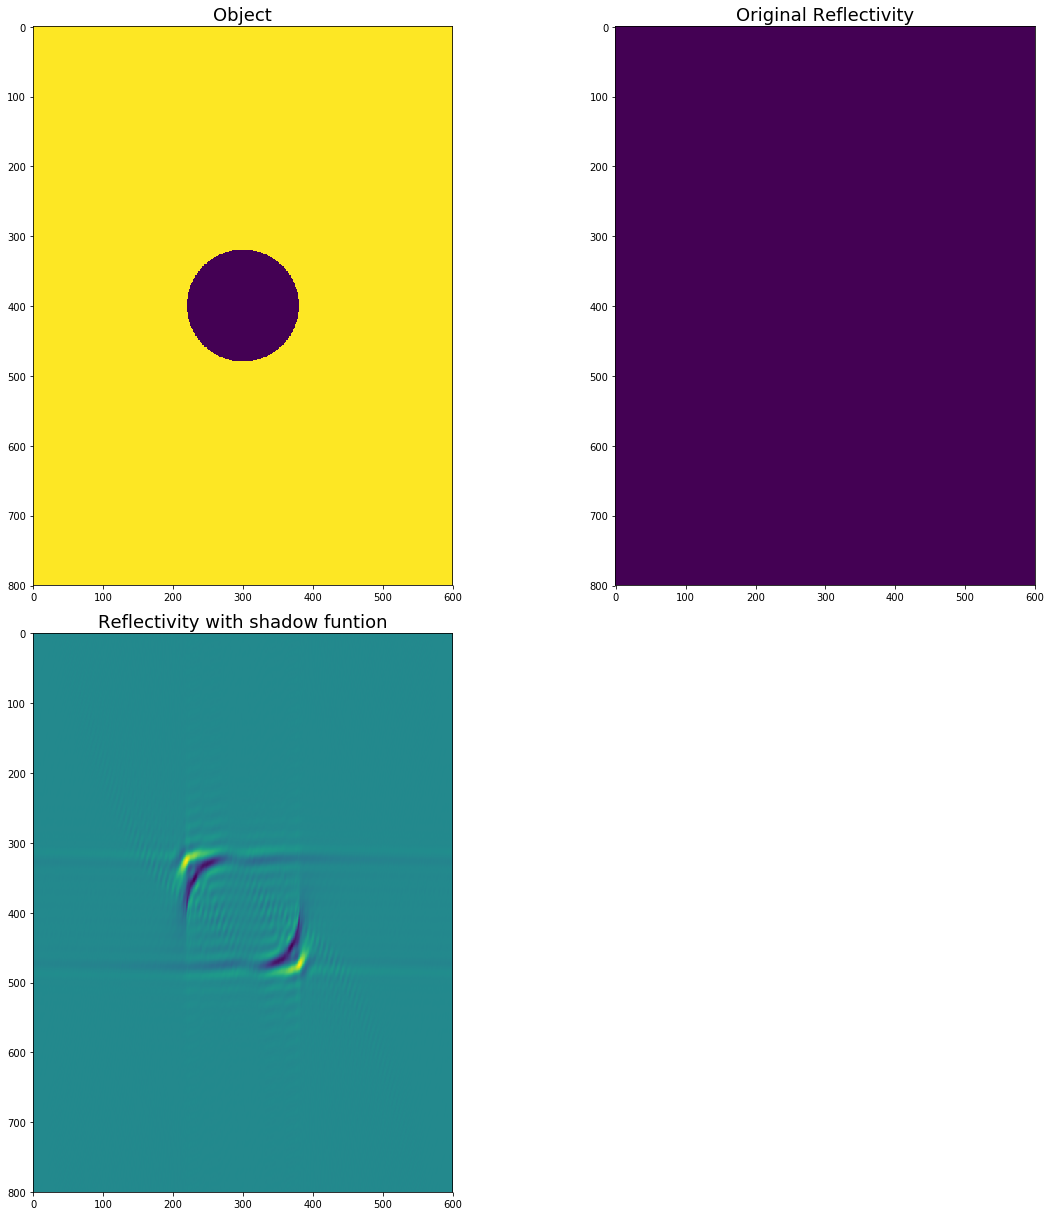

In [76]:
IPSII = transform_with_shadow(gimg,np.ones(np.shape(gimg)))

plt.subplots(figsize=(17,17))
plt.subplot(2,2,1)
plt.title('Object', fontsize=18)
plt.imshow(gimg)

plt.subplot(2,2,2)
plt.title('Original Reflectivity', fontsize=18)
plt.imshow(np.ones(np.shape(gimg)))

plt.subplot(2,2,3)
plt.title('Reflectivity with shadow funtion', fontsize=18)
plt.imshow(np.fft.ifft2(IPSII).real)

plt.tight_layout()
plt.show()

In [ ]:
theta = 60*np.pi/180
phi = 60*np.pi/180
for line in fileinput.input("/home/carter/test.pov", inplace=1):
    if "light_source" in line:
        
        start = line.find( '<' )
        end = line.find( '>' )
        if start != -1 and end != -1:
            result = line[start+1:end]
        line = line.replace(result,str(((-1)**fileinput.lineno())*np.cos(theta)*np.sin(phi))+","+str(np.cos(phi))+","+str(((-1)**fileinput.lineno())*np.sin(theta)*np.sin(phi)))
    sys.stdout.write(line)

subprocess.Popen(["povray +Itest.pov Height=800 Width=600"],shell=True)


In [44]:
# for i in range(30,40):
for j in range(300,370,10):
    i = 1
    theta = j*np.pi/180
    phi = i*np.pi/180

    lightx = np.cos(theta)*np.sin(phi)*100000
    lighty = np.cos(phi)*100000
    lightz = np.sin(theta)*np.sin(phi)*100000
    Options1 = " Declare=light1x="+str(lightx)+" Declare=light1y="+str(lighty)+" Declare=light1z="+str(lightz)
    Options2 = " Declare=light2x="+str(-lightx)+" Declare=light2y="+str(lighty)+" Declare=light2z="+str(-lightz)
    image_filepath = " Output_File_Name=testing"+str(i)+str(j)+".png"
    subprocess.Popen(["povray +Itest2.pov +H800 +W600"+image_filepath+Options1+Options2],shell=True)


In [46]:
image = mpimg.imread("/home/carter//Documents/Research/2D IPSII/Third try through terminal/test2.png")
gimg = np.dot(image, [0.2989, 0.5870, 0.1140])
mytrutharray = (gimg[int(np.shape(gimg)[0]/2)-1][int(np.shape(gimg)[1]/2)-1] < gimg) & (gimg < gimg[0][0])
image2 = np.copy(image)
image2[mytrutharray] = 0
image2[np.logical_not(mytrutharray)] = 1

plt.figure(figsize=(8,8))
plt.imshow(gimg)
plt.show()
plt.close("all")

ValueError: shapes (800,600,4) and (3,) not aligned: 4 (dim 2) != 3 (dim 0)

In [45]:
## Converting "Third try through terminal" images all to shadow images

image_filepath = "/home/carter/Documents/Research/2D IPSII/Third try through terminal/"

for i in range(0,41):
    if i<40:
        for j in range(0,181):
            image = mpimg.imread(image_filepath+"test"+str(i).zfill(2)+str(j).zfill(3)+".png")
            gimg = np.dot(image, [0.2989, 0.5870, 0.1140])
            mytrutharray = (gimg[int(np.shape(gimg)[0]/2)-1][int(np.shape(gimg)[1]/2)-1] < gimg) & (gimg < gimg[0][0])
            gimg[mytrutharray] = 0
            gimg[np.logical_not(mytrutharray)] = 1
            mpimg.imsave(image_filepath+"test"+str(i).zfill(2)+str(j).zfill(3)+".png", gimg)
    if i == 40:
        for j in range(0,80):
            image = mpimg.imread(image_filepath+"test"+str(i).zfill(2)+str(j).zfill(3)+".png")
            gimg = np.dot(image, [0.2989, 0.5870, 0.1140])
            mytrutharray = (gimg[int(np.shape(gimg)[0]/2)-1][int(np.shape(gimg)[1]/2)-1] < gimg) & (gimg < gimg[0][0])
            gimg[mytrutharray] = 0
            gimg[np.logical_not(mytrutharray)] = 1
            mpimg.imsave(image_filepath+"test"+str(i).zfill(2)+str(j).zfill(3)+".png", gimg)

            

ValueError: shapes (800,600,4) and (3,) not aligned: 4 (dim 2) != 3 (dim 0)

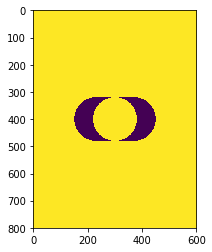

In [74]:
# image_filepath = "/home/carter/Documents/Research/2D IPSII/Third try through terminal/"
# image = mpimg.imread(image_filepath+"test2.png")
# gimg = np.dot(image, [0.2989, 0.5870, 0.1140])
# # mytrutharray = (gimg[int(np.shape(gimg)[0]/2)-1][int(np.shape(gimg)[1]/2)-1] < gimg) & (gimg < gimg[0][0])
# # gimg[mytrutharray] = 0
# # gimg[np.logical_not(mytrutharray)] = 1
# mpimg.imsave(image_filepath+"test2.png", gimg)




image = mpimg.imread("/home/carter//Documents/Research/2D IPSII/Third try through terminal/test30000.png")
np.shape(image[:,:,0])
plt.imshow(image[:,:,0])
plt.show()

In [17]:
a = [[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]
for i in range(4):
    for j in range(4):
        print(a[i][j])


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
